In [1]:
import pandas as pd
import pdb
pd.set_option('display.max_columns', 500)
categorical_cols = ['sex', 'education', 'race', 'country of birth self']
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt;
import numpy as np
import columns

In [2]:
columns = columns.columns

In [3]:
features = [ 'income', 'age', 'sex', 'education', 'race', 'weeks worked in year', 'country of birth self']

In [4]:
census_data = pd.read_csv('census_income_learn.csv')
test_census_data = pd.read_csv('census_income_test.csv')

In [5]:
census_data.columns = columns
test_census_data.columns = columns

In [6]:
train_data = census_data[features]
test_data = test_census_data[features]

# Feature Extraction

In [7]:
def extract_features(df):
    for col in categorical_cols:
        new_cols = pd.get_dummies(df[col])
        df.drop(columns=[col], inplace=True)
        df = df.join(new_cols)
    return df
    
train_data = extract_features(train_data)
test_data = extract_features(test_data)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
X_train, Y_train, X_test, Y_test = [train_data.iloc[:, 1:], train_data.iloc[:, :1], test_data.iloc[:, 1:], test_data.iloc[:, :1]]

# Training the models

In [9]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model = SVC()

In [10]:
KNN_model.fit(X_train, Y_train)
#SVC_model.fit(X_train, Y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Validating accuracy of models

In [11]:
prediction_01 = KNN_model.predict(X_test)
# prediction_02 = SVC_model.predict(X_test)
# accuracy_score(prediction_01, Y_test)
# accuracy_score(prediction_02, Y_test)

In [12]:
accuracy_score(prediction_01, Y_test)
#, accuracy_score(prediction_02, Y_test)

0.9357063381481742

# Correlation of features, sorted by correlation to income

In [13]:
corr_df = train_data.copy()

In [14]:
corr_df['income'] = [True if x == ' 50000+.' else False for x in corr_df['income']]

In [15]:
corr_df.corr().sort_values(by='income')['income']

 Female                                        -0.157609
 Children                                      -0.143627
 High school graduate                          -0.054520
 Black                                         -0.049827
 7th and 8th grade                             -0.044974
 10th grade                                    -0.044289
 9th grade                                     -0.041641
 11th grade                                    -0.040624
 5th or 6th grade                              -0.029643
 Foreign born- Not a citizen of U S            -0.028188
 1st 2nd 3rd or 4th grade                      -0.021679
 Other                                         -0.021054
 12th grade no diploma                         -0.019815
 Amer Indian Aleut or Eskimo                   -0.017839
 Less than 1st grade                           -0.016189
 Native- Born in Puerto Rico or U S Outlying   -0.014643
 Some college but no degree                     0.003631
 Native- Born abroad of America

# The number of males making 50000+ vs the number of females

([<matplotlib.patches.Wedge at 0x1a1c204400>,
 [Text(-0.8583216442286628, 0.6879563612967068, 'Male'),
  Text(0.8583216764342231, -0.6879563211157705, 'Female')])

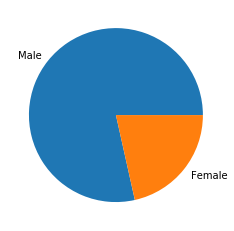

In [16]:
males_over_5000 = train_data.loc[(train_data[' Male'] == 1) & (train_data['income'] == ' 50000+.')].shape[0]
females_over_5000 = train_data.loc[(train_data[' Female'] == 1) & (train_data['income'] == ' 50000+.')].shape[0]
plt.pie([males_over_5000, females_over_5000], labels=['Male', 'Female'])

# Education Level, and Percentage of individuals at that level who make 50000+

In [17]:
educational_levels = (' Masters degree(MA MS MEng MEd MSW MBA)', ' High school graduate', ' Some college but no degree')
percentages_over_50000 = []
for edu in educational_levels:
    total_edu_holders = train_data.loc[train_data[edu] == 1]
    edu_with_5000_plus = total_edu_holders.loc[total_edu_holders['income'] == ' 50000+.']
    percentages_over_50000 += [( edu_with_5000_plus.shape[0] / total_edu_holders.shape[0]) * 100]

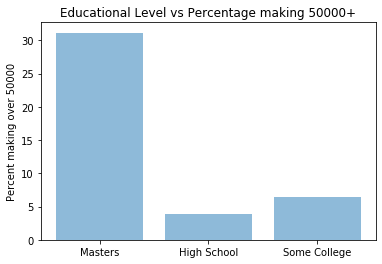

In [18]:
y_pos = np.arange(len(educational_levels))
performance = percentages_over_50000

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, ['Masters', 'High School', 'Some College'])
plt.ylabel('Percent making over 50000')
plt.title('Educational Level vs Percentage making 50000+')

plt.show()

# Age vs Number of Individuals Making Income of 50000+

In [19]:
def sum_income(incomes):
    return sum([1 if income == ' 50000+.' else 0 for income in incomes])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


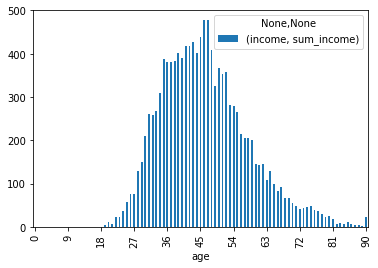

In [20]:
age_by_total_over_50000 = train_data.groupby('age').agg({'income': [sum_income]})
age_by_total_over_50000

n = 9

ax = age_by_total_over_50000.plot(kind='bar')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.figure.show()